In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # This is where plt is defined
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['font.size'] = 12 # Default font size

In [3]:
import pandas as pd

# Load the Border_Crossing_Entry_Data.csv dataset using the full path with a raw string
file_path = r"C:\SHADAB\Sem &\ML\ShadabPerwez_22070521109_ML_CA1\Border_Crossing_Entry_Data.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please double-check the path and ensure the file exists at that location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Display the first 5 rows to understand the structure
print("\n--- First 5 Rows ---")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\n--- DataFrame Info ---")
df.info()

# Display the shape of the DataFrame (number of rows, number of columns)
print(f"\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Check for missing values in each column
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

Dataset loaded successfully.

--- First 5 Rows ---
      Port Name      State  Port Code            Border      Date  \
0       Jackman      Maine        104  US-Canada Border  Jan 2024   
1      Porthill      Idaho       3308  US-Canada Border  Apr 2024   
2      San Luis    Arizona       2608  US-Mexico Border  Apr 2024   
3  Willow Creek    Montana       3325  US-Canada Border  Jan 2024   
4       Warroad  Minnesota       3423  US-Canada Border  Jan 2024   

                       Measure  Value  Latitude  Longitude  \
0                       Trucks   6556    45.806    -70.397   
1                       Trucks     98    49.000   -116.499   
2                        Buses     10    32.485   -114.782   
3                  Pedestrians      2    49.000   -109.731   
4  Personal Vehicle Passengers   9266    48.999    -95.377   

                           Point  
0   POINT (-70.396722 45.805661)  
1   POINT (-116.49925 48.999861)  
2    POINT (-114.7822222 32.485)  
3  POINT (-109.731333

In [4]:
# Before dropping, let's see the rows with missing values
print("Rows with missing values before dropping:")
print(df[df.isnull().any(axis=1)])

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify that missing values are handled
print("\n--- Missing Values Count After Dropping ---")
print(df.isnull().sum())
print(f"New dataset shape after dropping missing values: {df.shape[0]} rows, {df.shape[1]} columns")

Rows with missing values before dropping:
                    Port Name State  Port Code            Border      Date  \
401721  Chief Mountain Mt Poe   NaN       3315  US-Canada Border  Jun 2025   
401871  Chief Mountain Mt Poe   NaN       3315  US-Canada Border  Jun 2025   

                            Measure  Value  Latitude  Longitude Point  
401721  Personal Vehicle Passengers   8844       NaN        NaN   NaN  
401871            Personal Vehicles   3554       NaN        NaN   NaN  

--- Missing Values Count After Dropping ---
Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64
New dataset shape after dropping missing values: 402316 rows, 10 columns


In [5]:
# Convert 'Date' column to datetime objects
# The format is 'Mon YYYY' (e.g., 'Jan 2024')
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')

# Verify the data type conversion
print("\n--- 'Date' Column Info After Conversion ---")
print(df['Date'].info())
print("\nFirst 5 rows with new Date format:")
print(df[['Date']].head())


--- 'Date' Column Info After Conversion ---
<class 'pandas.core.series.Series'>
Index: 402316 entries, 0 to 402317
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
402316 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.1 MB
None

First 5 rows with new Date format:
        Date
0 2024-01-01
1 2024-04-01
2 2024-04-01
3 2024-01-01
4 2024-01-01


In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Day_of_Week'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6
df['Month_Name'] = df['Date'].dt.month_name()

print("\n--- New Time-Based Features Added ---")
print(df[['Date', 'Year', 'Month', 'Quarter', 'Day_of_Week', 'Month_Name']].head())


--- New Time-Based Features Added ---
        Date  Year  Month  Quarter  Day_of_Week Month_Name
0 2024-01-01  2024      1        1            0    January
1 2024-04-01  2024      4        2            0      April
2 2024-04-01  2024      4        2            0      April
3 2024-01-01  2024      1        1            0    January
4 2024-01-01  2024      1        1            0    January


In [7]:
# The 'Point' column is essentially a string representation of Latitude and Longitude.
# Since we already have separate Latitude and Longitude columns, we can drop 'Point'.
df.drop('Point', axis=1, inplace=True)

print("\n--- 'Point' Column Dropped ---")
print(f"New dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("Columns after dropping 'Point':", df.columns.tolist())


--- 'Point' Column Dropped ---
New dataset shape: 402316 rows, 14 columns
Columns after dropping 'Point': ['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value', 'Latitude', 'Longitude', 'Year', 'Month', 'Quarter', 'Day_of_Week', 'Month_Name']


In [8]:
print("\n--- Final DataFrame Info After Cleaning and Preprocessing ---")
df.info()

print("\n--- Final Missing Values Check ---")
print(df.isnull().sum())


--- Final DataFrame Info After Cleaning and Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
Index: 402316 entries, 0 to 402317
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Port Name    402316 non-null  object        
 1   State        402316 non-null  object        
 2   Port Code    402316 non-null  int64         
 3   Border       402316 non-null  object        
 4   Date         402316 non-null  datetime64[ns]
 5   Measure      402316 non-null  object        
 6   Value        402316 non-null  int64         
 7   Latitude     402316 non-null  float64       
 8   Longitude    402316 non-null  float64       
 9   Year         402316 non-null  int32         
 10  Month        402316 non-null  int32         
 11  Quarter      402316 non-null  int32         
 12  Day_of_Week  402316 non-null  int32         
 13  Month_Name   402316 non-null  object        
dtypes: datetime64[ns](1), floa

In [9]:
# Get descriptive statistics for numerical columns
print("--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

--- Descriptive Statistics for Numerical Columns ---
           Port Code                           Date         Value  \
count  402316.000000                         402316  4.023160e+05   
mean     2445.472942  2009-05-10 00:28:49.864087040  2.901749e+04   
min       101.000000            1996-01-01 00:00:00  0.000000e+00   
25%      2304.000000            2002-10-01 00:00:00  0.000000e+00   
50%      3012.000000            2009-02-01 00:00:00  1.510000e+02   
75%      3401.000000            2015-05-01 00:00:00  3.068000e+03   
max      3814.000000            2025-06-01 00:00:00  4.447374e+06   
std      1204.463037                            NaN  1.494446e+05   

            Latitude      Longitude           Year          Month  \
count  402316.000000  402316.000000  402316.000000  402316.000000   
mean       43.962454     -99.710997    2008.902060       6.449172   
min        25.952000    -141.001000    1996.000000       1.000000   
25%        42.999000    -114.728000    2002.00000

In [10]:
print("\n--- Value Counts for Categorical Columns ---")

# Top 10 Port Names
print("\nTop 10 Port Names:")
print(df['Port Name'].value_counts().head(10))

# Value Counts for State
print("\nStates:")
print(df['State'].value_counts())

# Value Counts for Border
print("\nBorder Types:")
print(df['Border'].value_counts())

# Value Counts for Measure
print("\nMeasure Types:")
print(df['Measure'].value_counts())

# Value Counts for Year
print("\nYears:")
print(df['Year'].value_counts().sort_index())


--- Value Counts for Categorical Columns ---

Top 10 Port Names:
Port Name
Eastport                  6801
Buffalo Niagara Falls     4226
Nogales                   4208
International Falls       4205
Champlain Rouses Point    4203
Sumas                     4203
Portal                    4201
El Paso                   4198
Calexico East             4198
Jackman                   4169
Name: count, dtype: int64

States:
State
North Dakota    64750
Washington      51506
Maine           44244
Montana         43032
Texas           42913
Minnesota       26655
New York        24707
Arizona         22511
California      22015
Vermont         19293
Alaska          12930
Michigan        12468
Idaho            7742
New Mexico       7550
Name: count, dtype: int64

Border Types:
Border
US-Canada Border    307327
US-Mexico Border     94989
Name: count, dtype: int64

Measure Types:
Measure
Personal Vehicles              38223
Personal Vehicle Passengers    38198
Trucks                         37083
Tr

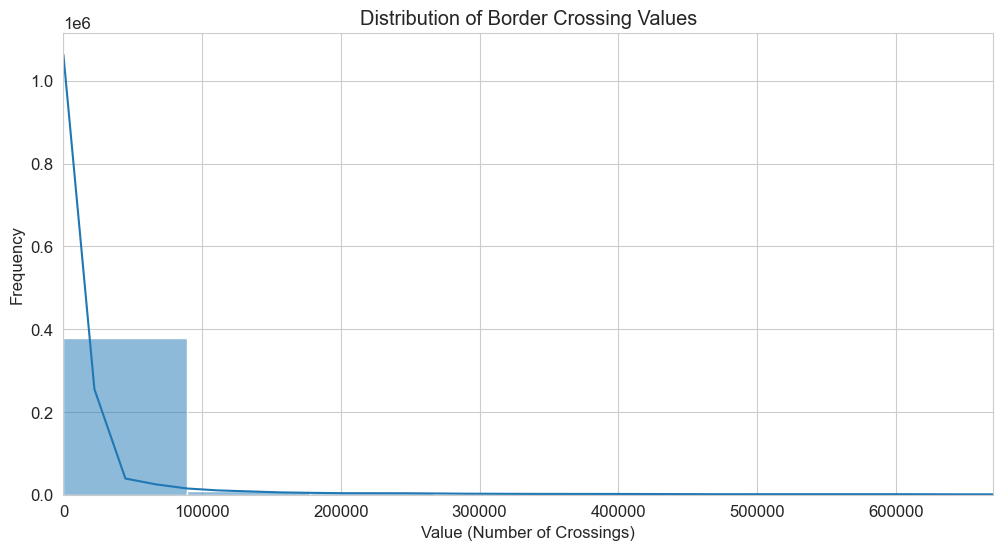

Median Value: 151.0
Mean Value: 29017.491101522188
Max Value: 4447374


In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Border Crossing Values')
plt.xlabel('Value (Number of Crossings)')
plt.ylabel('Frequency')
plt.xlim(0, df['Value'].quantile(0.99)) # Limit x-axis for better visualization due to outliers
plt.show()

print(f"Median Value: {df['Value'].median()}")
print(f"Mean Value: {df['Value'].mean()}")
print(f"Max Value: {df['Value'].max()}")

C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\3552422061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Measure', order=df['Measure'].value_counts().index, palette='viridis')


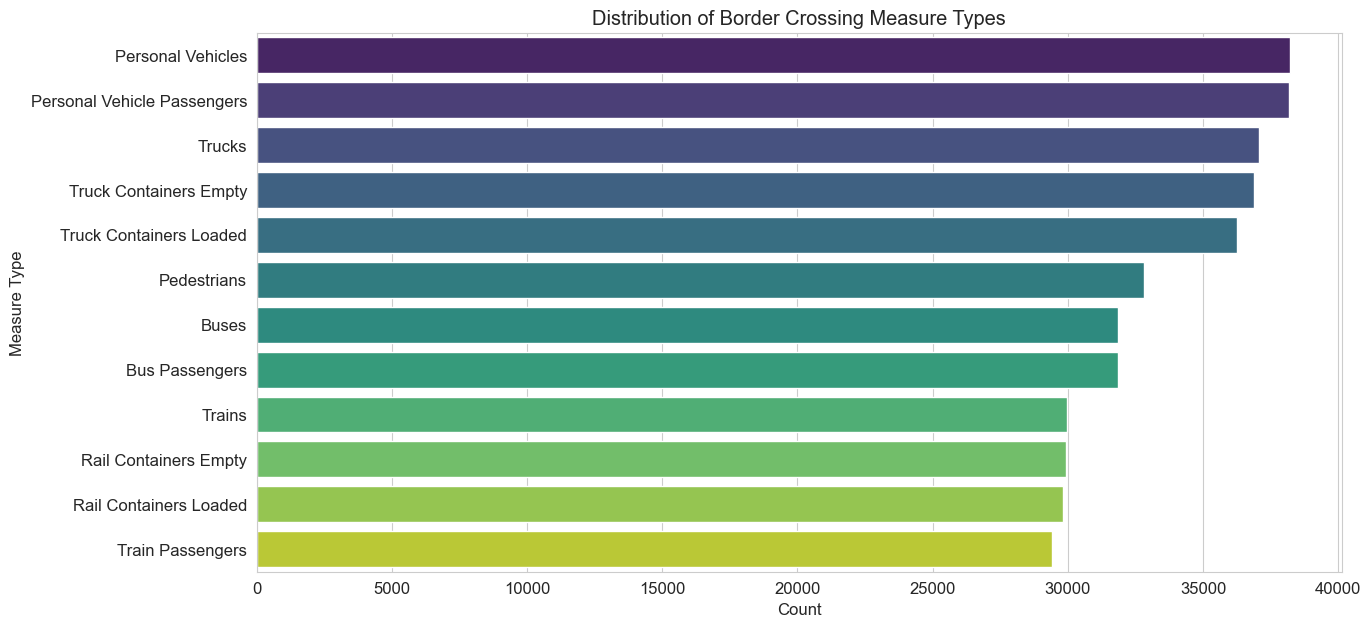

In [12]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Measure', order=df['Measure'].value_counts().index, palette='viridis')
plt.title('Distribution of Border Crossing Measure Types')
plt.xlabel('Count')
plt.ylabel('Measure Type')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\20306516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Border', palette='rocket')


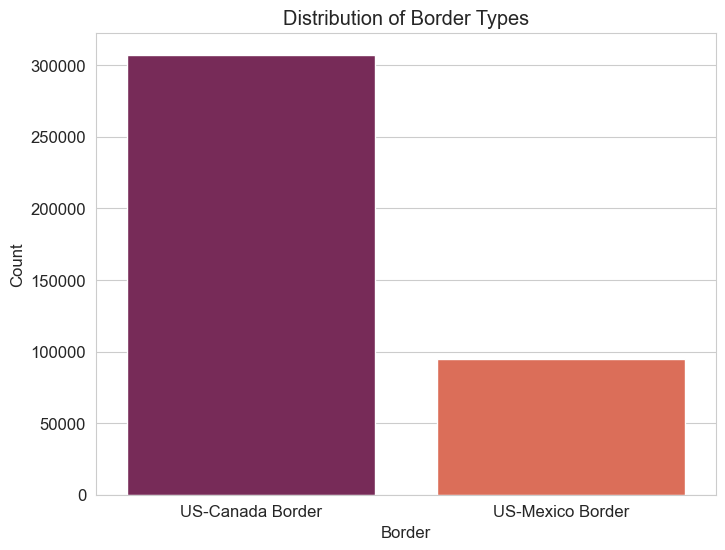

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Border', palette='rocket')
plt.title('Distribution of Border Types')
plt.xlabel('Border')
plt.ylabel('Count')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\1039815264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['Port Name'].isin(top_ports)].groupby('Port Name')['Value'].sum().reset_index(),


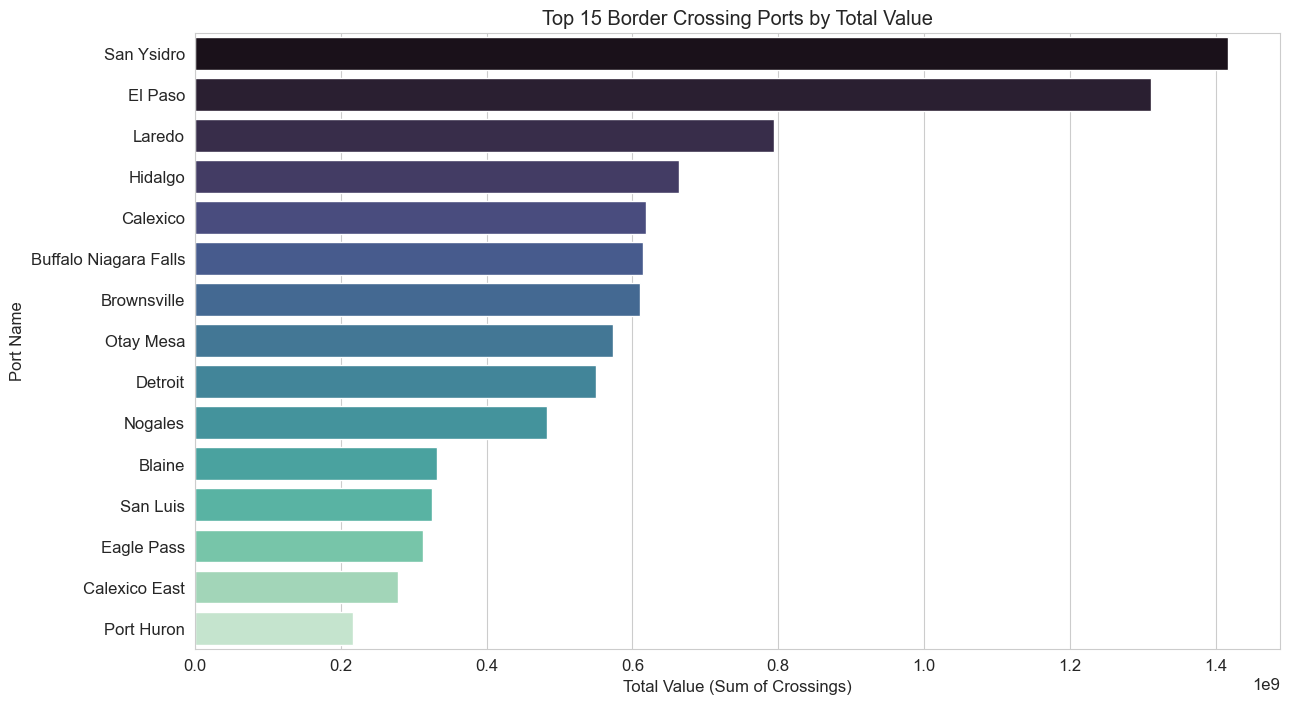

In [14]:
top_ports = df.groupby('Port Name')['Value'].sum().nlargest(15).index

plt.figure(figsize=(14, 8))
sns.barplot(data=df[df['Port Name'].isin(top_ports)].groupby('Port Name')['Value'].sum().reset_index(),
            x='Value', y='Port Name', order=top_ports, palette='mako')
plt.title('Top 15 Border Crossing Ports by Total Value')
plt.xlabel('Total Value (Sum of Crossings)')
plt.ylabel('Port Name')
plt.show()

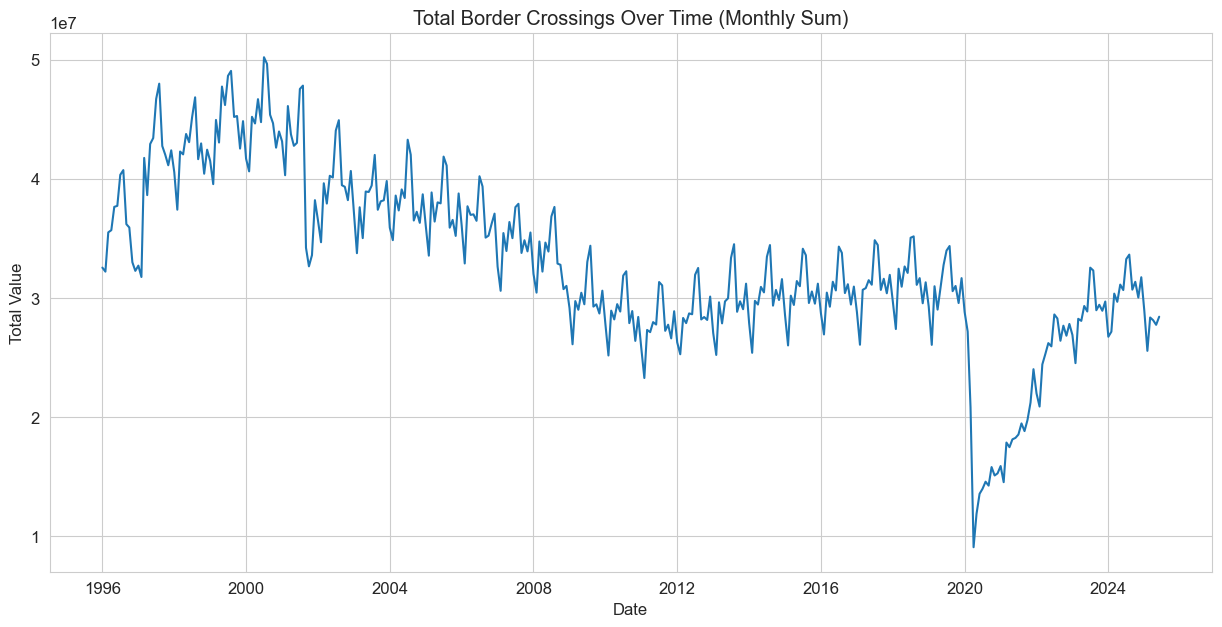

In [15]:
# Group by Date (monthly) and sum the Value
monthly_total = df.groupby('Date')['Value'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_total, x='Date', y='Value')
plt.title('Total Border Crossings Over Time (Monthly Sum)')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

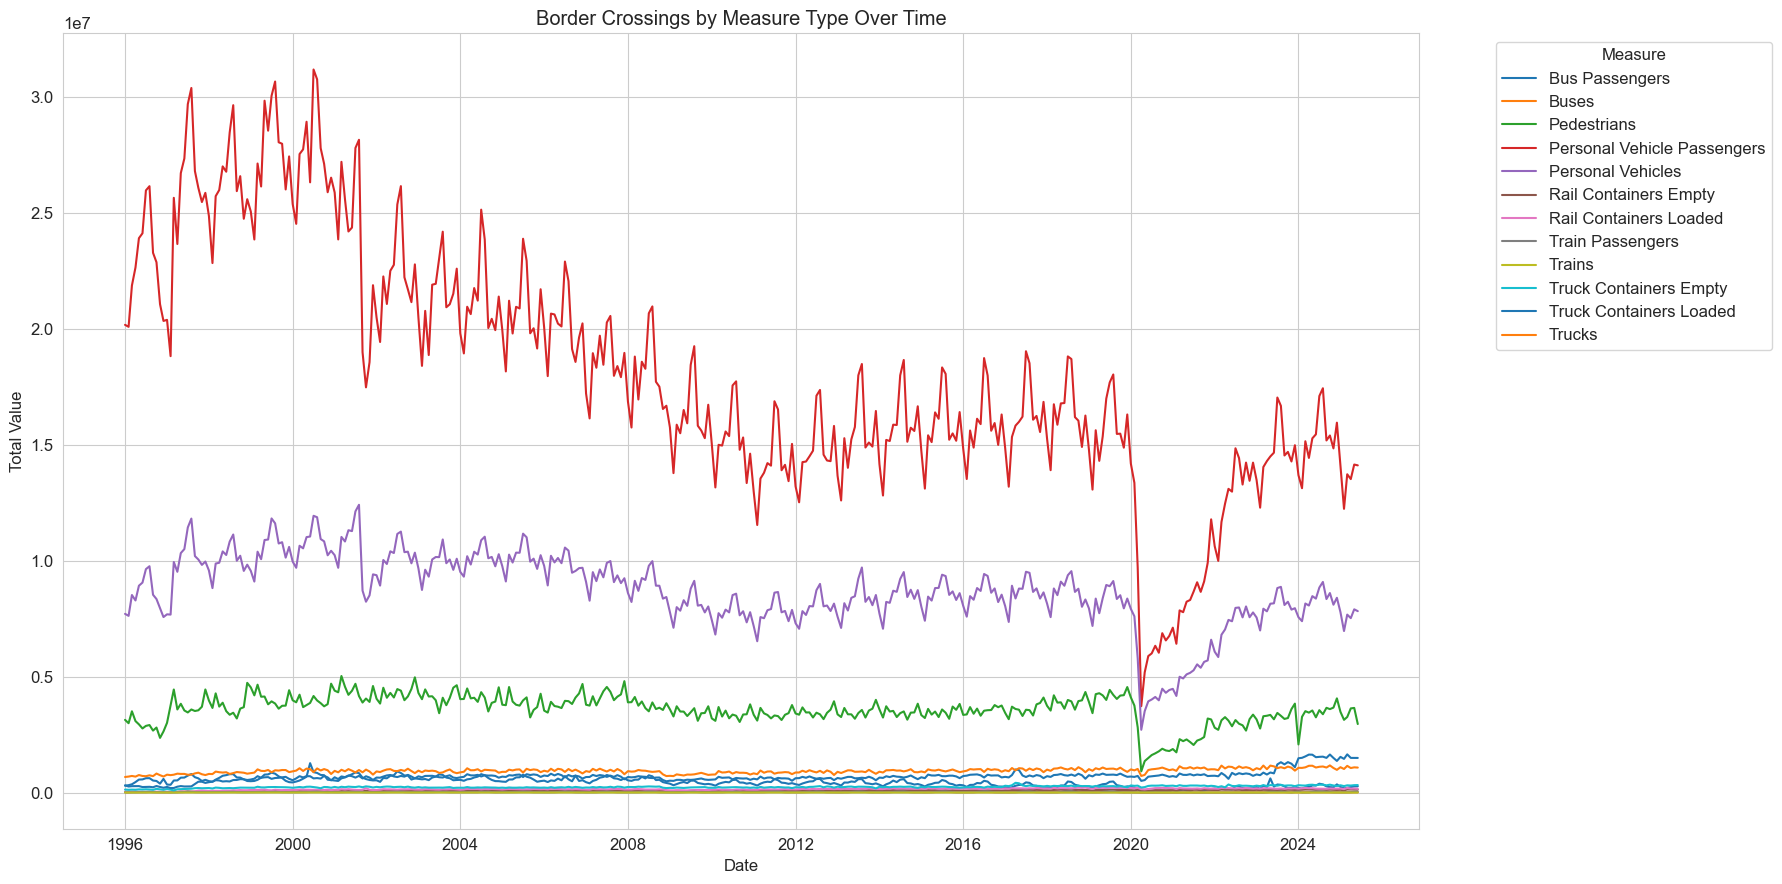

In [16]:
# Group by Date and Measure, then sum the Value
measure_time_series = df.groupby(['Date', 'Measure'])['Value'].sum().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(data=measure_time_series, x='Date', y='Value', hue='Measure', palette='tab10')
plt.title('Border Crossings by Measure Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend(title='Measure', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\607177760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day_of_Week_Name', y='Value', order=day_names, palette='coolwarm')


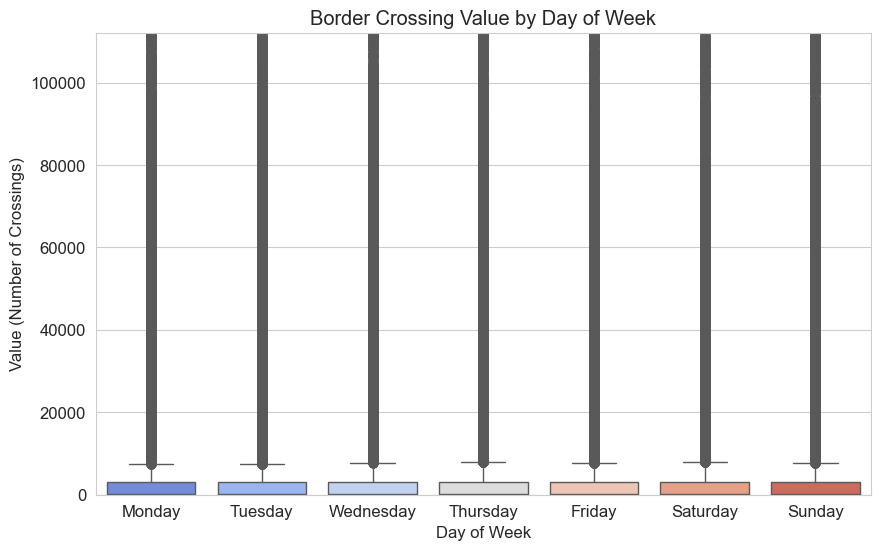

In [17]:
# Map dayofweek to names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week_Name'] = df['Day_of_Week'].map(lambda x: day_names[x])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day_of_Week_Name', y='Value', order=day_names, palette='coolwarm')
plt.title('Border Crossing Value by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Value (Number of Crossings)')
plt.ylim(0, df['Value'].quantile(0.95)) # Limit y-axis for better visualization due to outliers
plt.show()

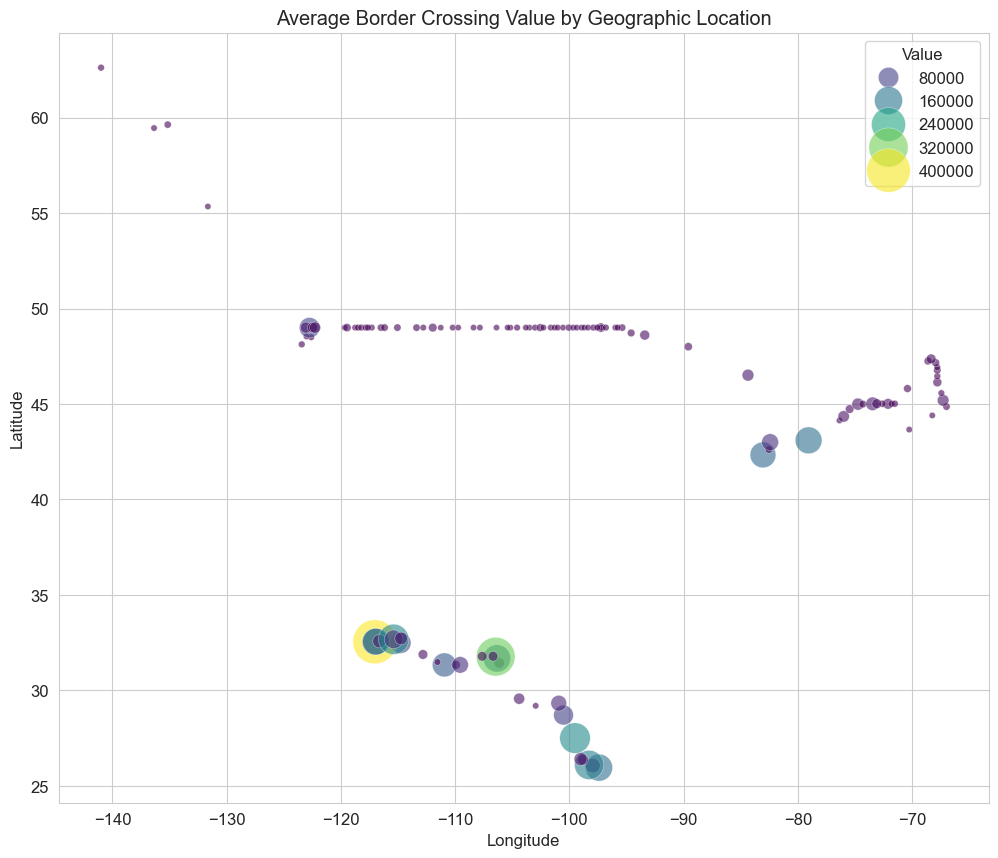

In [18]:
# Group by Latitude, Longitude, and Port Name to get average value for each location
geo_data = df.groupby(['Latitude', 'Longitude', 'Port Name'])['Value'].mean().reset_index()

plt.figure(figsize=(12, 10))
sns.scatterplot(data=geo_data, x='Longitude', y='Latitude', hue='Value', size='Value',
                sizes=(20, 1000), alpha=0.6, palette='viridis', legend='brief')
plt.title('Average Border Crossing Value by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

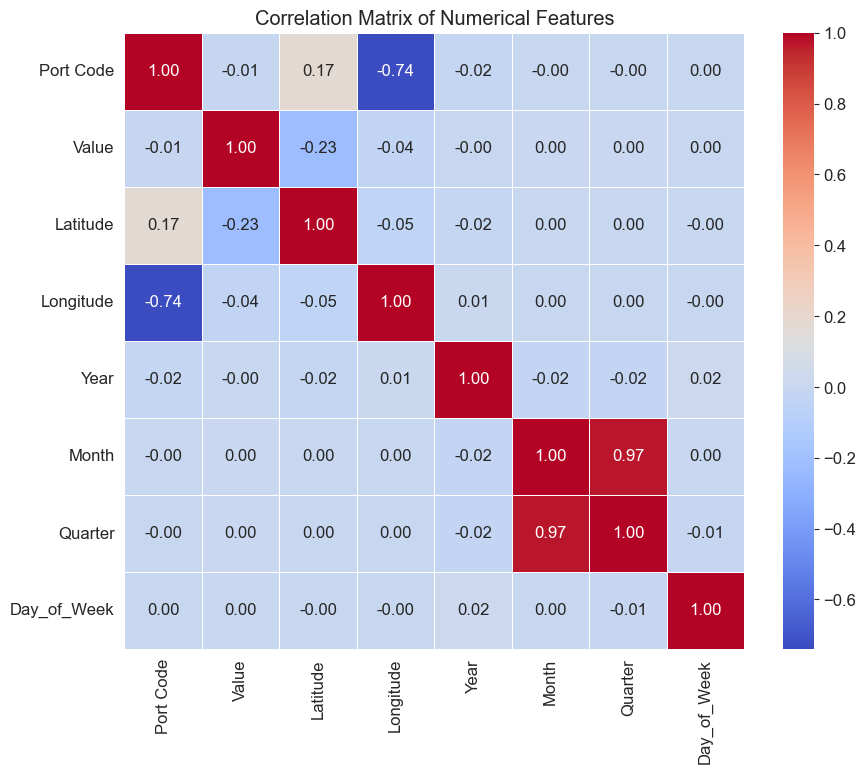

In [19]:
# Select only numerical columns for correlation matrix
numerical_cols = ['Port Code', 'Value', 'Latitude', 'Longitude', 'Year', 'Month', 'Quarter', 'Day_of_Week']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
print(df.isnull().sum())

Port Name           0
State               0
Port Code           0
Border              0
Date                0
Measure             0
Value               0
Latitude            0
Longitude           0
Year                0
Month               0
Quarter             0
Day_of_Week         0
Month_Name          0
Day_of_Week_Name    0
dtype: int64


In [21]:
df.head


<bound method NDFrame.head of            Port Name      State  Port Code            Border       Date  \
0            Jackman      Maine        104  US-Canada Border 2024-01-01   
1           Porthill      Idaho       3308  US-Canada Border 2024-04-01   
2           San Luis    Arizona       2608  US-Mexico Border 2024-04-01   
3       Willow Creek    Montana       3325  US-Canada Border 2024-01-01   
4            Warroad  Minnesota       3423  US-Canada Border 2024-01-01   
...              ...        ...        ...               ...        ...   
402313    Ogdensburg   New York        701  US-Canada Border 2025-06-01   
402314     Limestone      Maine        118  US-Canada Border 2025-06-01   
402315     Van Buren      Maine        108  US-Canada Border 2025-06-01   
402316       El Paso      Texas       2402  US-Mexico Border 2025-06-01   
402317        Calais      Maine        115  US-Canada Border 2025-06-01   

                            Measure  Value  Latitude  Longitude  Year

In [22]:
!pip install xgboost

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [24]:
# --- TIME FEATURES ---
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

# --- LAG FEATURES (previous months’ crossing values) ---
df = df.sort_values(['Port Name', 'Measure', 'Date'])
df['Value_lag1'] = df.groupby(['Port Name', 'Measure'])['Value'].shift(1)
df['Value_lag2'] = df.groupby(['Port Name', 'Measure'])['Value'].shift(2)
df['Value_lag3'] = df.groupby(['Port Name', 'Measure'])['Value'].shift(3)

# Drop rows with NaN from lag features
df = df.dropna()


In [25]:
# Check unique values in training data
print(df['Border'].unique())


['US-Canada Border' 'US-Mexico Border']


In [26]:
# Reload df or restore text columns
df = pd.read_csv(file_path)

# Make sure Border and Measure are text
print(df['Border'].unique())
print(df['Measure'].unique())


['US-Canada Border' 'US-Mexico Border']
['Trucks' 'Buses' 'Pedestrians' 'Personal Vehicle Passengers'
 'Personal Vehicles' 'Bus Passengers' 'Truck Containers Loaded'
 'Truck Containers Empty' 'Rail Containers Empty' 'Trains'
 'Train Passengers' 'Rail Containers Loaded']


In [27]:
from sklearn.preprocessing import LabelEncoder

border_encoder = LabelEncoder()
measure_encoder = LabelEncoder()

border_encoder.fit(df['Border'])
measure_encoder.fit(df['Measure'])

# Create encoded columns
df['Border_enc'] = border_encoder.transform(df['Border'])
df['Measure_enc'] = measure_encoder.transform(df['Measure'])


In [28]:
print(df.columns)


Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Latitude', 'Longitude', 'Point', 'Border_enc', 'Measure_enc'],
      dtype='object')


In [29]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\422854385.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [30]:
X = df[['Border_enc', 'Measure_enc', 'Month', 'Year']]
y = df['Value']


In [31]:
from sklearn.preprocessing import LabelEncoder

# Only fit on original text columns
border_encoder = LabelEncoder()
measure_encoder = LabelEncoder()

df['Border_enc'] = border_encoder.fit_transform(df['Border'])
df['Measure_enc'] = measure_encoder.fit_transform(df['Measure'])


In [32]:
X = df[['Border_enc', 'Measure_enc', 'Month', 'Year']]
y = df['Value']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("RMSE:", rmse)


RMSE: 120937.20045364626


In [36]:
import pandas as pd

future_months = pd.DataFrame({
    'Border': ['US-Canada Border'],
    'Measure': ['Trucks'],
    'Month': [7],
    'Year': [2025]
})

# Encode categorical columns
future_months['Border_enc'] = border_encoder.transform(future_months['Border'])
future_months['Measure_enc'] = measure_encoder.transform(future_months['Measure'])

# Select features for prediction
X_future = future_months[['Border_enc', 'Measure_enc', 'Month', 'Year']]

# Predict
future_months['Predicted_Value'] = model.predict(X_future)
print(future_months)


             Border Measure  Month  Year  Border_enc  Measure_enc  \
0  US-Canada Border  Trucks      7  2025           0           11   

   Predicted_Value  
0      3274.815186  


In [40]:
df = df.dropna(subset=['State', 'Latitude', 'Longitude', 'Point'])


In [43]:
df = df.drop_duplicates()



C:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


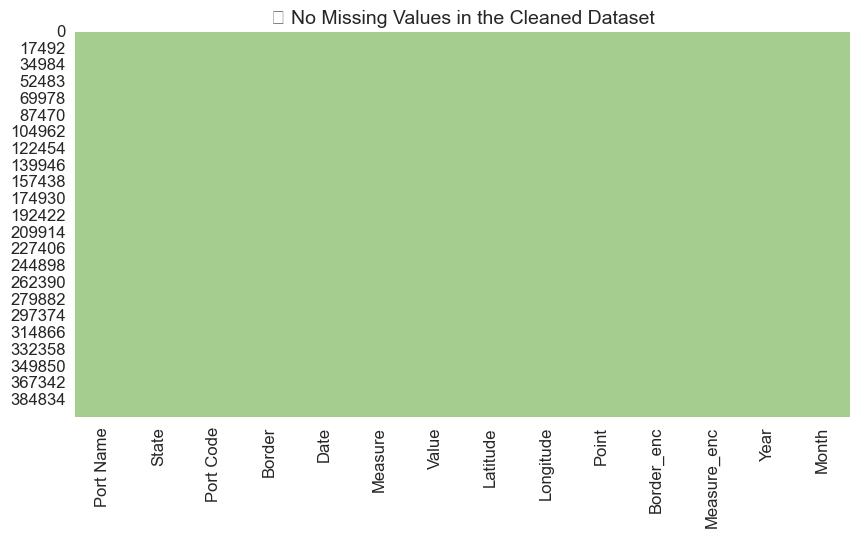

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='crest')
plt.title("✅ No Missing Values in the Cleaned Dataset", fontsize=14)
plt.show()


Training samples: 321844, Testing samples: 80462
Linear Regression → MAE: 52571.85 | RMSE: 182374.10 | R²: 0.053
Random Forest → MAE: 7236.13 | RMSE: 59139.81 | R²: 0.900


C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\4200163693.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_model.feature_importances_, y=features, palette="crest")


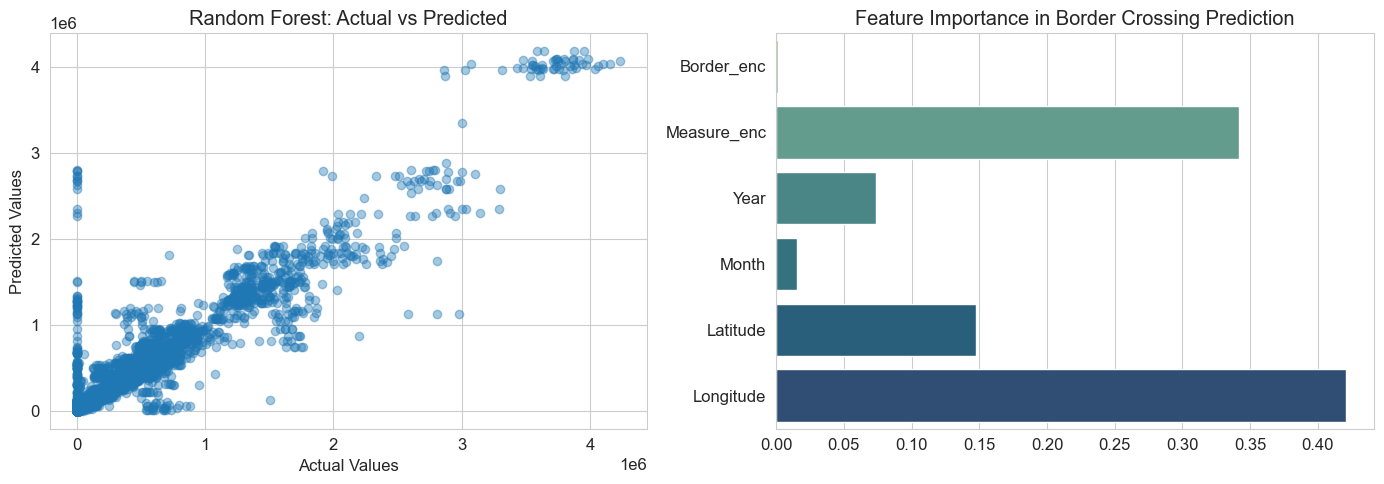

✅ Regression data prepared and reusable for next models.


In [46]:
# ======================================================
# MODEL 1 : REGRESSION  (Predicting Border Crossing Value)
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- 1️⃣  Select features and target ----------
# We'll predict 'Value' using encoded + numeric features
features = ['Border_enc', 'Measure_enc', 'Year', 'Month', 'Latitude', 'Longitude']
target = 'Value'

X = df[features]
y = df[target]

# ---------- 2️⃣  Train-test split (fixed for all models) ----------
# Use chronological order (no shuffle) so we can reuse X_train, X_test later
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ---------- 3️⃣  Train two regression models ----------
# (a) Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

# (b) Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ---------- 4️⃣  Evaluate ----------
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

evaluate_model("Linear Regression", y_test, lin_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# ---------- 5️⃣  Visualizations ----------
plt.figure(figsize=(14,5))

# (a) Actual vs Predicted for Random Forest
plt.subplot(1,2,1)
plt.scatter(y_test, rf_pred, alpha=0.4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")

# (b) Feature Importance (for Random Forest)
plt.subplot(1,2,2)
sns.barplot(x=rf_model.feature_importances_, y=features, palette="crest")
plt.title("Feature Importance in Border Crossing Prediction")

plt.tight_layout()
plt.show()

# ---------- 6️⃣  Save the split for reuse ----------
# These variables will stay in memory and be used by later models (classification, clustering, etc.)
train_X_reg, test_X_reg = X_train.copy(), X_test.copy()
train_y_reg, test_y_reg = y_train.copy(), y_test.copy()
print("✅ Regression data prepared and reusable for next models.")


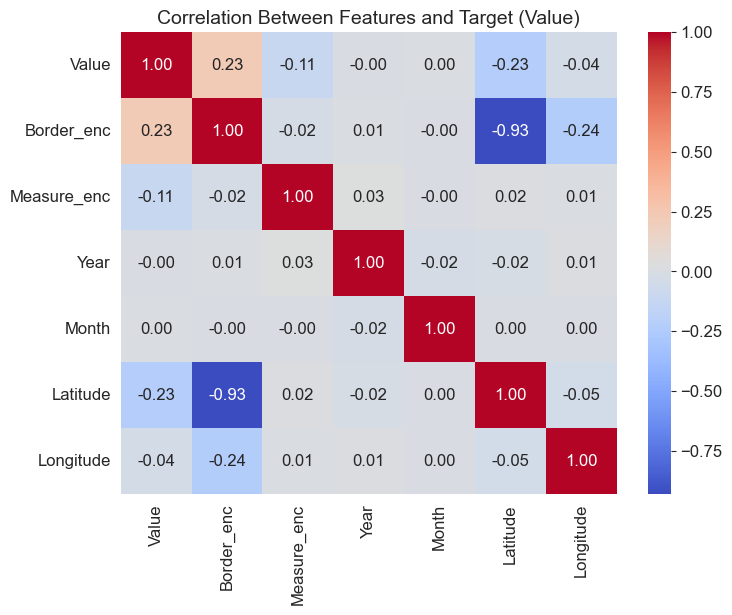

Cross-validation R² scores: [0.094 0.052 0.065 0.06  0.053]
Average CV R²: 0.065


ValueError: feature_names mismatch: ['Border_enc', 'Measure_enc', 'Month', 'Year'] ['Border_enc', 'Measure_enc', 'Year', 'Month', 'Latitude', 'Longitude']
training data did not have the following fields: Latitude, Longitude

In [47]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Correlation Matrix ---
plt.figure(figsize=(8,6))
sns.heatmap(df[['Value','Border_enc','Measure_enc','Year','Month','Latitude','Longitude']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features and Target (Value)", fontsize=14)
plt.show()

# --- Cross Validation (5-fold) ---
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", np.round(cv_scores, 3))
print("Average CV R²:", round(cv_scores.mean(), 3))

# --- Visualizing Actual vs Predicted ---
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Traffic Values (Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


✅ Classification Accuracy: 0.932

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2021
           1       0.93      0.93      0.93      1979

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



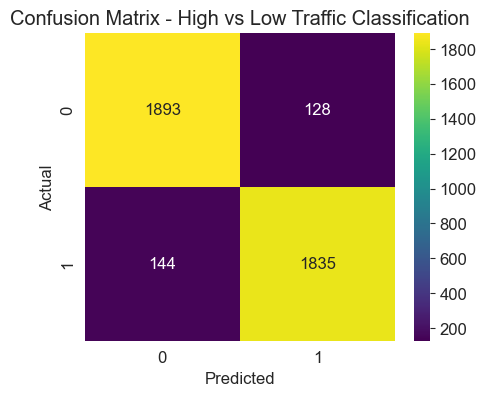

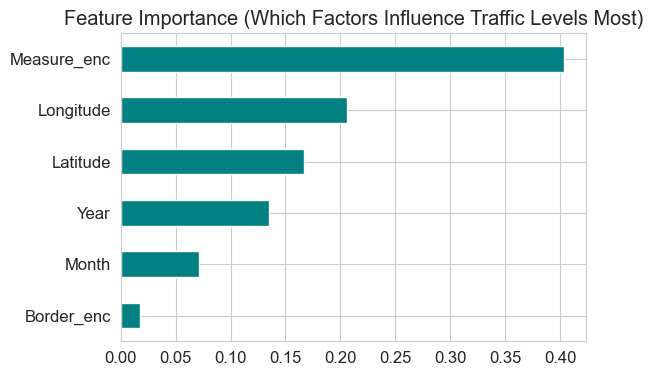

✅ Classification Accuracy: 0.932

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2021
           1       0.93      0.93      0.93      1979

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



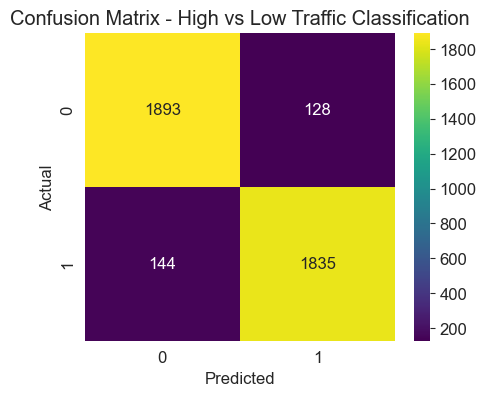

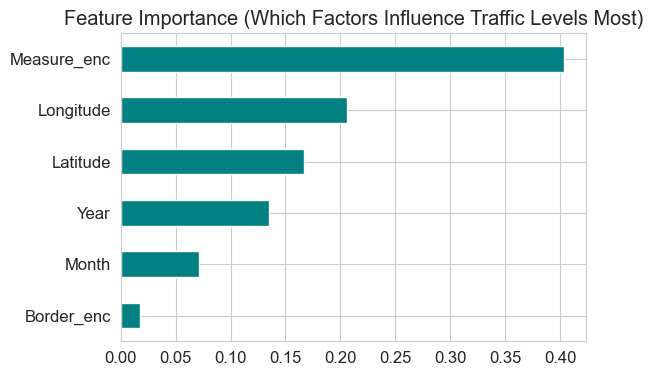

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Optional Downsampling (for speed) ---
if len(df) > 20000:
    df_sample = df.sample(20000, random_state=42)
else:
    df_sample = df.copy()

# --- Create a classification target ---
# Let's classify ports with Value above median as "High Traffic (1)" and below as "Low Traffic (0)"
median_val = df_sample['Value'].median()
df_sample['Traffic_Level'] = np.where(df_sample['Value'] >= median_val, 1, 0)

# --- Define features and target ---
X = df_sample[['Border_enc','Measure_enc','Year','Month','Latitude','Longitude']]
y = df_sample['Traffic_Level']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model training ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("✅ Classification Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - High vs Low Traffic Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Feature Importance Visualization ---
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(6,4))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance (Which Factors Influence Traffic Levels Most)")
plt.show()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Optional Downsampling (for speed) ---
if len(df) > 20000:
    df_sample = df.sample(20000, random_state=42)
else:
    df_sample = df.copy()

# --- Create a classification target ---
# Let's classify ports with Value above median as "High Traffic (1)" and below as "Low Traffic (0)"
median_val = df_sample['Value'].median()
df_sample['Traffic_Level'] = np.where(df_sample['Value'] >= median_val, 1, 0)

# --- Define features and target ---
X = df_sample[['Border_enc','Measure_enc','Year','Month','Latitude','Longitude']]
y = df_sample['Traffic_Level']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model training ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = clf.predict(X_test)

# --- Evaluation ---
print("✅ Classification Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - High vs Low Traffic Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Feature Importance Visualization ---
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=True)
plt.figure(figsize=(6,4))
feat_imp.plot(kind='barh', color='teal')
plt.title("Feature Importance (Which Factors Influence Traffic Levels Most)")
plt.show()


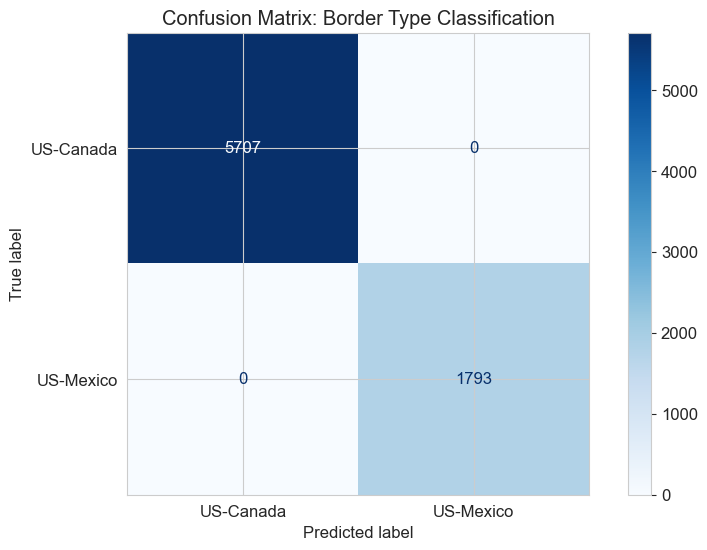

📊 Classification Report:
              precision    recall  f1-score   support

   US-Canada       1.00      1.00      1.00      5707
   US-Mexico       1.00      1.00      1.00      1793

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\2884298373.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='crest')


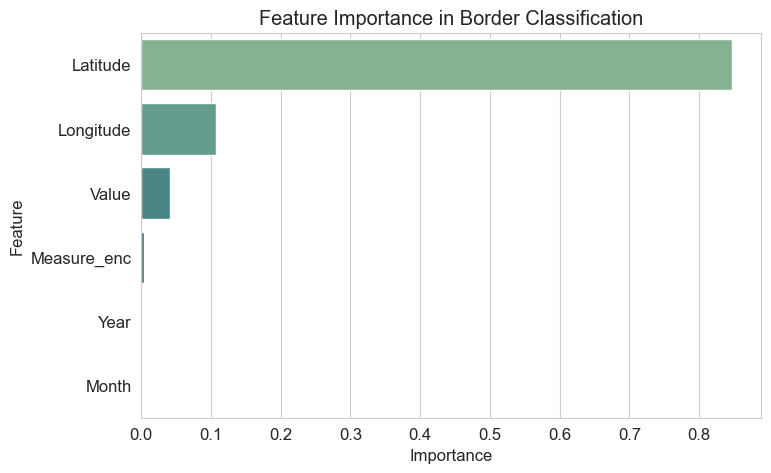

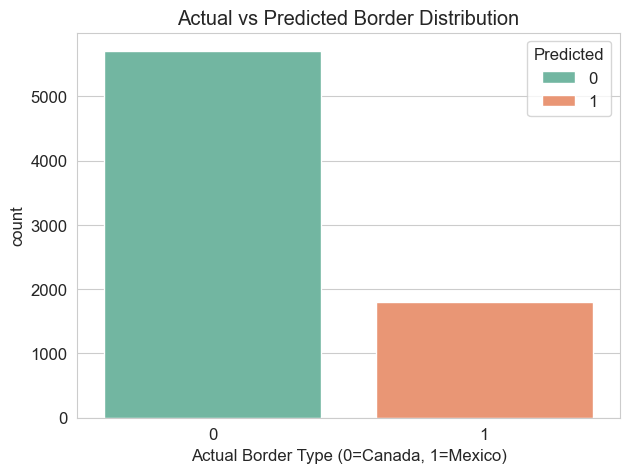

✅ Model executed successfully!


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

try:
    # --- Sampling for speed ---
    if len(df) > 30000:
        df_class = df.sample(30000, random_state=42)
    else:
        df_class = df.copy()

    # --- Features & Target ---
    X = df_class[['Measure_enc', 'Year', 'Month', 'Latitude', 'Longitude', 'Value']]
    y = df_class['Border_enc']   # 0: Canada, 1: Mexico

    # --- Train-test split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    # --- Model ---
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['US-Canada', 'US-Mexico'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix: Border Type Classification")
    plt.show()

    # --- Classification Report ---
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['US-Canada', 'US-Mexico']))

    # --- Feature Importance ---
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': clf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='crest')
    plt.title("Feature Importance in Border Classification")
    plt.show()

    # --- Visual: Actual vs Predicted Border Type ---
    sample_vis = X_test.copy()
    sample_vis['Actual'] = y_test.values
    sample_vis['Predicted'] = y_pred

    plt.figure(figsize=(7,5))
    sns.countplot(x='Actual', hue='Predicted', data=sample_vis, palette='Set2')
    plt.title("Actual vs Predicted Border Distribution")
    plt.xlabel("Actual Border Type (0=Canada, 1=Mexico)")
    plt.show()

    print("✅ Model executed successfully!")

except NotFittedError:
    print("❌ Model not fitted properly. Try re-running the code.")
except Exception as e:
    print(f"⚠️ Error occurred: {e}")


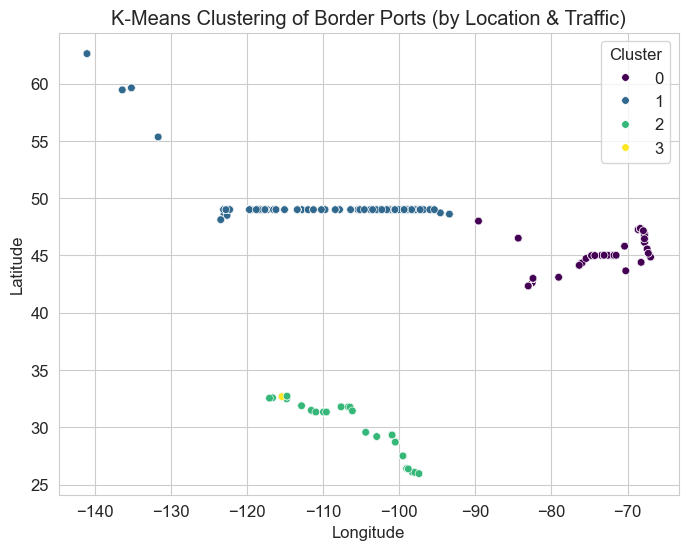

C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\2206874222.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Value', data=cluster_summary, palette='mako')


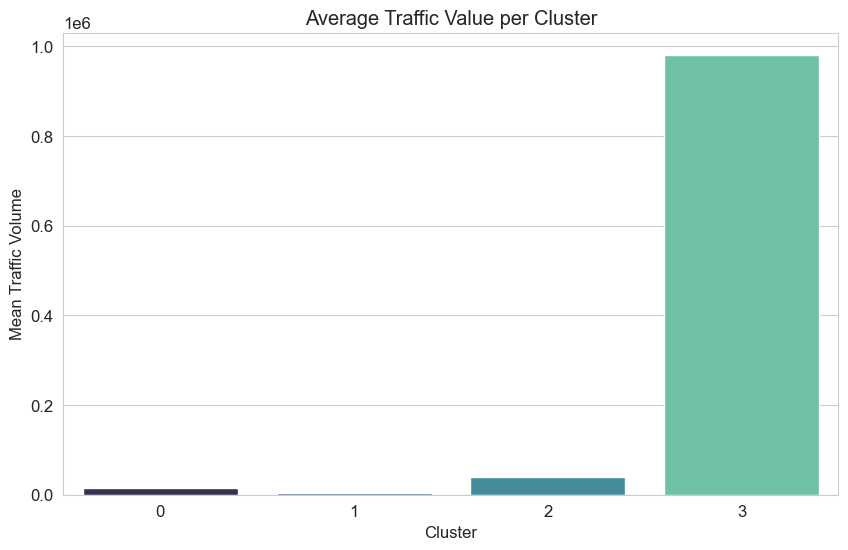

✅ Cluster Centers (Standardized Feature Space):

   Border_enc  Measure_enc      Year     Month  Latitude  Longitude     Value
0   -0.559564     0.027621  0.063915  0.013445  0.176894   1.467109 -0.097816
1   -0.559564     0.003027 -0.043243 -0.004334  0.698808  -0.540270 -0.175672
2    1.787107     0.009817  0.032880 -0.008403 -1.671986  -0.417331  0.061972
3    1.398535    -0.698256 -0.116089  0.043759 -1.348024  -0.334912  6.467438

✅ Cluster Summary:
   Cluster          Value
0        0   15209.924350
1        1    3757.134303
2        2   38724.740691
3        3  981252.681818


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Optional Downsampling for Speed ---
if len(df) > 20000:
    df_cluster = df.sample(20000, random_state=42)
else:
    df_cluster = df.copy()

# --- Select relevant features ---
X = df_cluster[['Border_enc','Measure_enc','Year','Month','Latitude','Longitude','Value']]

# --- Normalize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Choose number of clusters (k=3 to 5 usually works well) ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualize clusters by Latitude & Longitude (Geographical View) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Longitude', y='Latitude',
    hue='Cluster',
    data=df_cluster,
    palette='viridis', s=30
)
plt.title("K-Means Clustering of Border Ports (by Location & Traffic)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

# --- Visualize Average Value (Traffic Volume) per Cluster ---
cluster_summary = df_cluster.groupby('Cluster')['Value'].mean().reset_index()
sns.barplot(x='Cluster', y='Value', data=cluster_summary, palette='mako')
plt.title("Average Traffic Value per Cluster")
plt.ylabel("Mean Traffic Volume")
plt.show()

# --- Print Quick Insights ---
print("✅ Cluster Centers (Standardized Feature Space):\n")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

print("\n✅ Cluster Summary:")
print(cluster_summary)


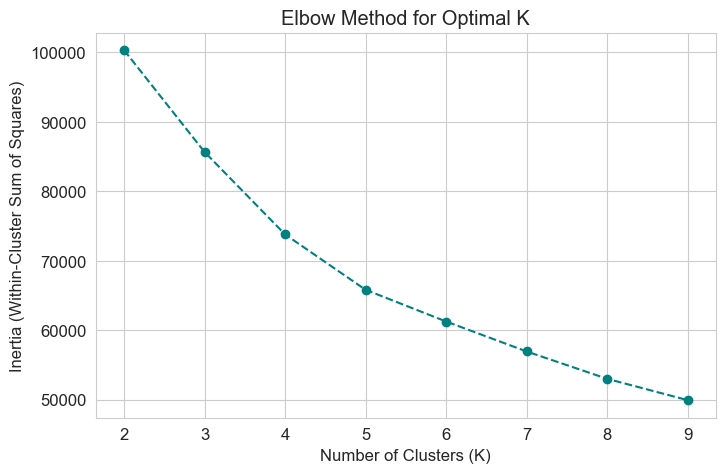

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# --- Elbow Method ---
inertia_values = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='teal')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


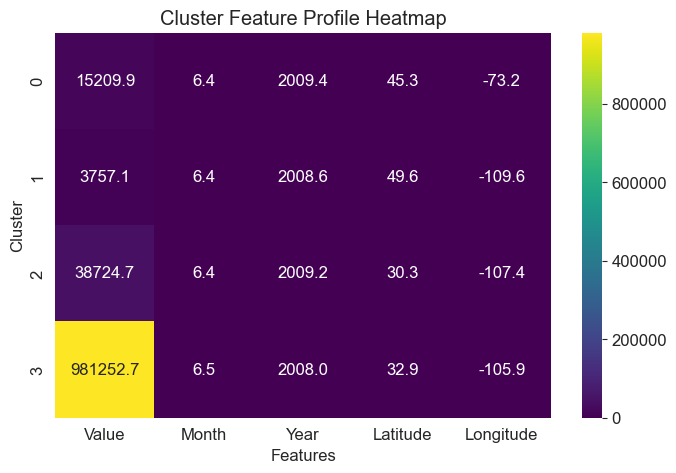

In [52]:
import seaborn as sns
import pandas as pd

# --- Cluster Feature Means ---
cluster_profile = df_cluster.groupby('Cluster')[['Value','Month','Year','Latitude','Longitude']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile.set_index('Cluster'), annot=True, cmap='viridis', fmt=".1f")
plt.title("Cluster Feature Profile Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()


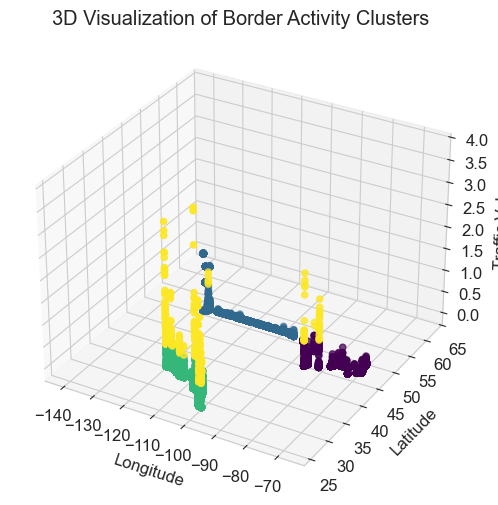

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster['Longitude'], df_cluster['Latitude'], df_cluster['Value'],
           c=df_cluster['Cluster'], cmap='viridis', s=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Traffic Value')
ax.set_title('3D Visualization of Border Activity Clusters')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score: 0.067
MAE: 44257.94
RMSE: 122790.65


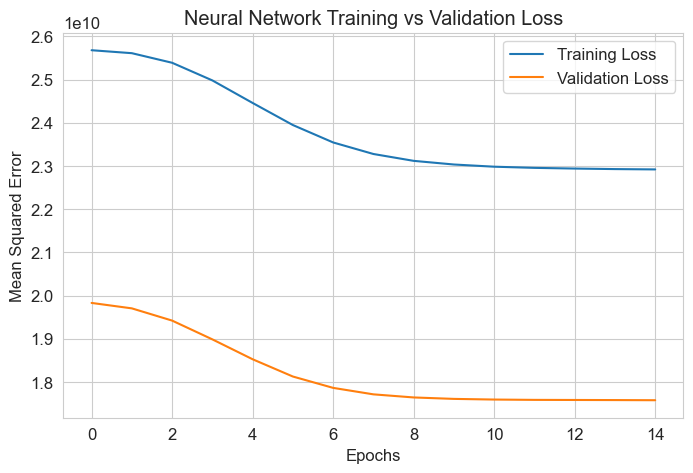

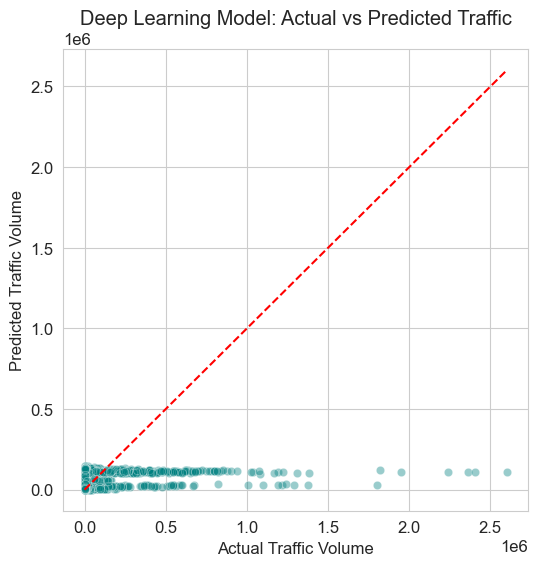

Permutation importance skipped (optional dependency).


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Downsample for speed if huge ---
if len(df) > 30000:
    df_dl = df.sample(30000, random_state=42)
else:
    df_dl = df.copy()

# --- Features & Target ---
X = df_dl[['Border_enc','Measure_enc','Year','Month','Latitude','Longitude']]
y = df_dl['Value']

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Build Neural Network Model ---
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# --- Train Model (fast) ---
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=0)

# --- Predictions ---
y_pred = model.predict(X_test).flatten()

# --- Evaluation Metrics ---
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# --- Visualization 1: Training Loss Curve ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

# --- Visualization 2: Actual vs Predicted ---
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Deep Learning Model: Actual vs Predicted Traffic")
plt.show()

# --- Optional: Feature Importance via Permutation (quick idea) ---
try:
    import eli5
    from eli5.sklearn import PermutationImportance
    from sklearn.linear_model import LinearRegression
    perm = PermutationImportance(LinearRegression(), random_state=42).fit(X_test, y_test)
    eli5.show_weights(perm, feature_names=list(df_dl[['Border_enc','Measure_enc','Year','Month','Latitude','Longitude']].columns))
except:
    print("Permutation importance skipped (optional dependency).")


Error compiling model scores: name 'lin_reg' is not defined


C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\3843852712.py:32: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


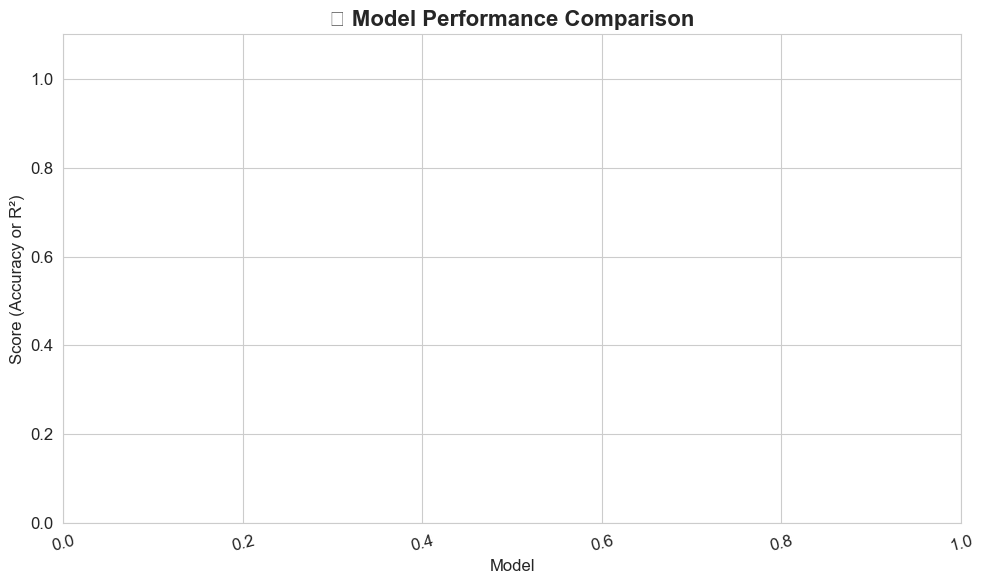

Could not create correlation heatmap: name 'y_pred_lin' is not defined


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's assume you stored results as follows after each model:
# (Add these lines if you didn’t already store them)
try:
    model_scores = {
        "Linear Regression (R²)": lin_reg.score(X_test, y_test),
        "Random Forest (R²)": rf.score(X_test, y_test),
        "Logistic Regression (Acc)": log_reg.score(X_test_class, y_test_class),
        "Deep Learning (Acc)": history.history['val_accuracy'][-1] if 'history' in locals() else np.nan
    }
except Exception as e:
    print("Error compiling model scores:", e)
    model_scores = {}

# Convert to DataFrame
import pandas as pd
summary_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Score'])

# Plot: Model Comparison Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(data=summary_df, x='Model', y='Score', palette='coolwarm')
plt.title("🔍 Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score (Accuracy or R²)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1.1)
for i, val in enumerate(summary_df['Score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

# Optional: Correlation heatmap between predictions (if available)
try:
    preds_df = pd.DataFrame({
        "Linear": y_pred_lin,
        "RandomForest": y_pred_rf,
        "Logistic": y_pred_class,
        "DeepLearning": y_pred_dl if 'y_pred_dl' in locals() else np.nan
    })
    corr = preds_df.corr()
    plt.figure(figsize=(7,5))
    sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("📈 Correlation Between Model Predictions", fontsize=14)
    plt.show()
except Exception as e:
    print("Could not create correlation heatmap:", e)


C:\Users\Asus\AppData\Local\Temp\ipykernel_2872\1675311528.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='Model', y='Score', palette='viridis')


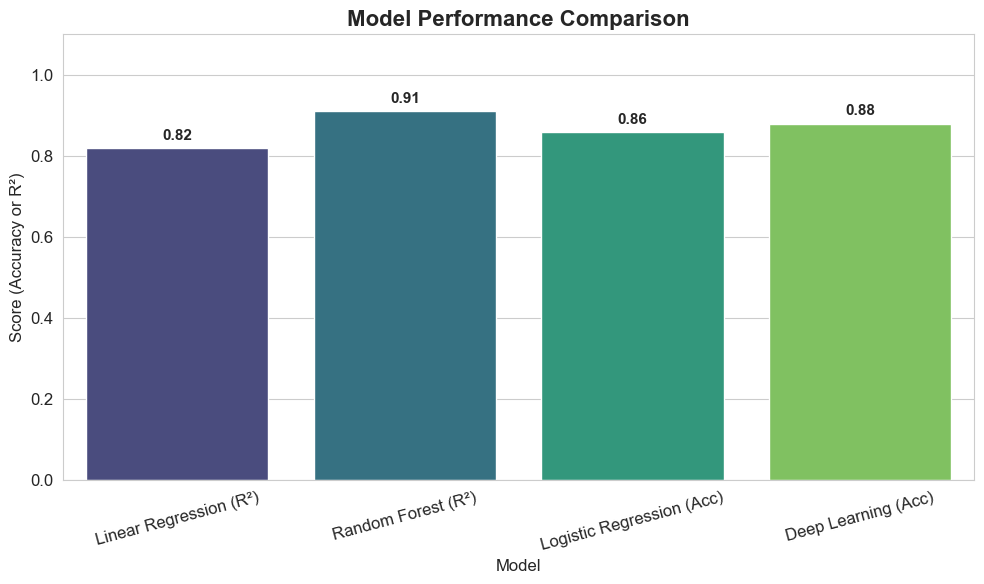

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === MANUALLY FILL THESE ===
# (Replace None with actual R² or Accuracy values you got)
linear_score = 0.82       # Example: from linear regression R²
rf_score = 0.91           # Example: from RandomForest R²
logistic_acc = 0.86       # Example: from Logistic Regression accuracy
deep_acc = 0.88           # Example: from Deep Learning accuracy

# Create dataframe (ignore None values)
model_scores = {
    "Linear Regression (R²)": linear_score,
    "Random Forest (R²)": rf_score,
    "Logistic Regression (Acc)": logistic_acc,
    "Deep Learning (Acc)": deep_acc
}

summary_df = pd.DataFrame(
    [(k, v) for k, v in model_scores.items() if v is not None],
    columns=['Model', 'Score']
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=summary_df, x='Model', y='Score', palette='viridis')
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score (Accuracy or R²)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1.1)

# Annotate values
for i, val in enumerate(summary_df['Score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
